In [1]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

In [60]:
class Patch:
    def __init__(self, x_lower, x_upper, y_lower, y_upper, nx, ny):
        self.x_lower = x_lower
        self.x_upper = x_upper
        self.y_lower = y_lower
        self.y_upper = y_upper
        
        self.nx = nx
        self.ny = ny
        self.dx = (x_upper - x_lower) / nx
        self.dy = (y_upper - y_lower) / ny
        
        self.x_points = (np.linspace(self.x_lower, self.x_upper, self.nx+1) + (self.dx/2))[:self.nx]
        self.y_points = (np.linspace(self.y_lower, self.y_upper, self.ny+1) + (self.dy/2))[:self.ny]

    def refine(self):
        x_mid = (self.x_lower + self.x_upper) / 2.0
        y_mid = (self.y_lower + self.y_upper) / 2.0
        return np.array([
            Patch(self.x_lower, x_mid, self.y_lower, y_mid, self.nx, self.ny),
            Patch(x_mid, self.x_upper, self.y_lower, y_mid, self.nx, self.ny),
            Patch(self.x_lower, x_mid, y_mid, self.y_upper, self.nx, self.ny),
            Patch(x_mid, self.x_upper, y_mid, self.y_upper, self.nx, self.ny)
        ])
        
    def plot(self, plotBox=True, plotPoints=True, plotEdges=True, plotName=True, edgeColor='b', pointColor='r',  name=''):
        
        # Create box
        if plotBox:
            coords = np.array([
                [self.x_lower, self.y_lower],
                [self.x_upper, self.y_lower],
                [self.x_upper, self.y_upper],
                [self.x_lower, self.y_upper],
                [self.x_lower, self.y_lower]
            ])
            plt.plot(coords[:,0], coords[:,1], '-k', lw=4)
        
        # Plot interior points
        if plotPoints:
            for j in range(self.ny):
                y_points = np.empty(self.nx)
                y_points.fill(self.y_points[j])
                plt.plot(self.x_points, y_points, '.' + pointColor, ms=16)
            
        # Plot boundary points
        if plotEdges:
            plt.plot(np.ones(self.ny)*self.x_lower, self.y_points, '.' + edgeColor, ms=32)
            plt.plot(np.ones(self.ny)*self.x_upper, self.y_points, '.' + edgeColor, ms=32)
            plt.plot(self.x_points, np.ones(self.nx)*self.y_lower, '.' + edgeColor, ms=32)
            plt.plot(self.x_points, np.ones(self.nx)*self.y_upper, '.' + edgeColor, ms=32)
            
        # Plot name or ID
        if plotName:
            plt.text((self.x_lower + self.x_upper)/2, (self.y_lower + self.y_upper)/2, name, fontsize=48, ha='center', va='center')

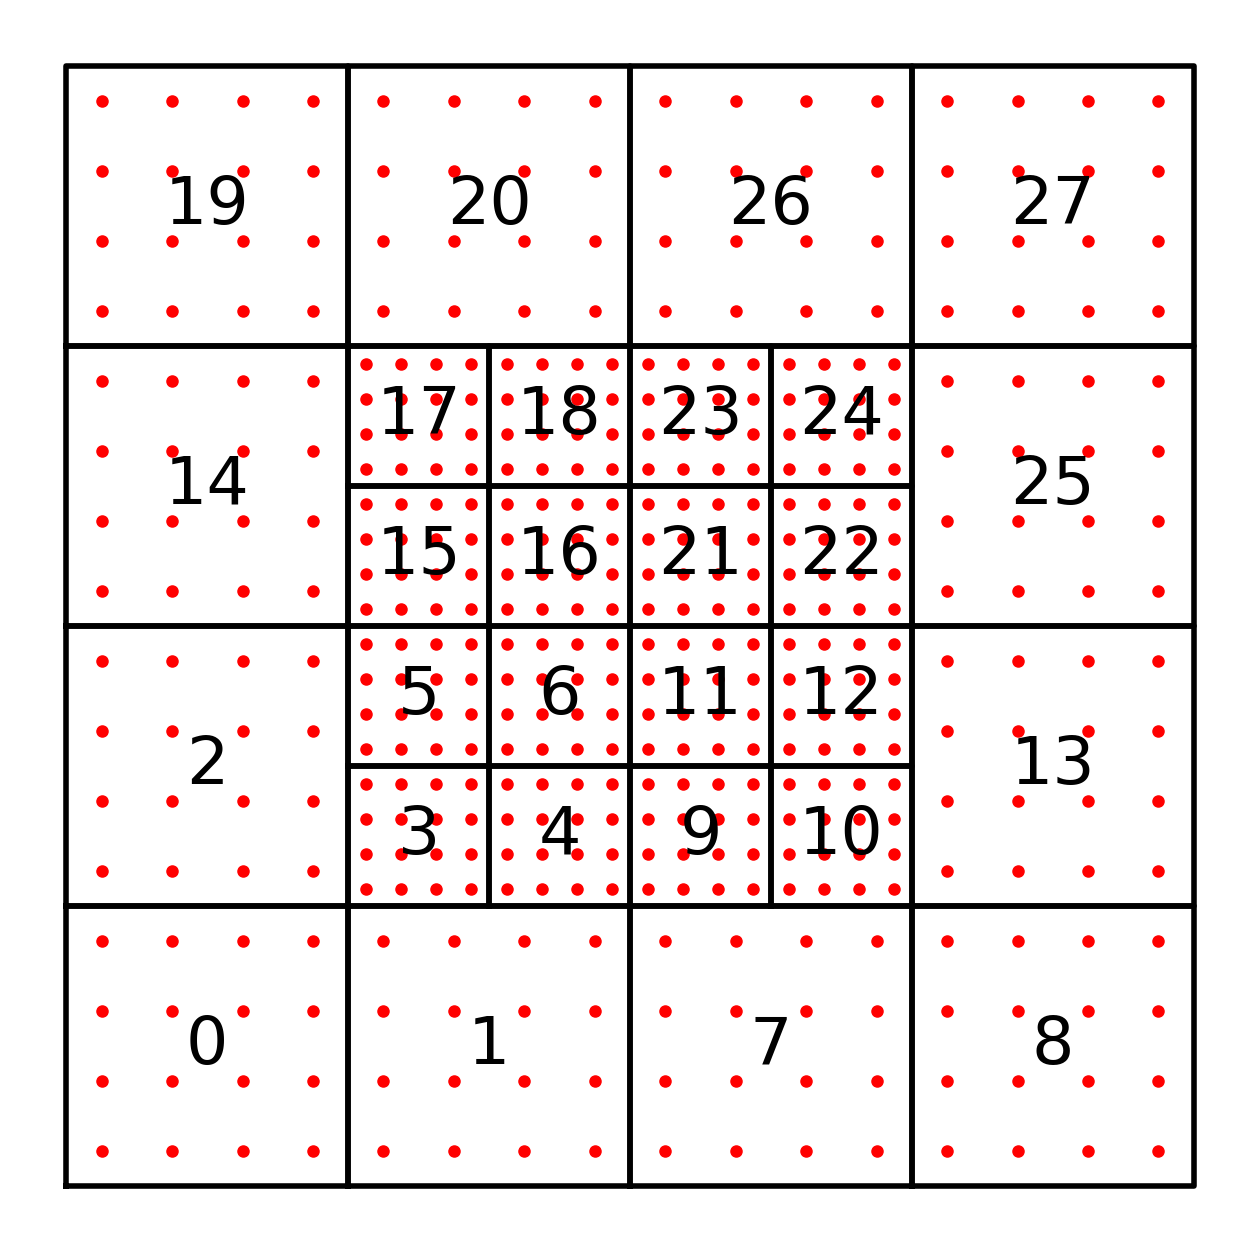

In [61]:
# Figure for adaptive mesh example
root_patch = Patch(0, 1, 0, 1, 4, 4)
level0 = np.array([root_patch])
level1 = np.array([n.refine() for n in level0]).flatten()
level2 = np.array([n.refine() for n in level1]).flatten()
level3 = np.array([level2[3].refine(), level2[6].refine(), level2[9].refine(), level2[12].refine()]).flatten()
level2 = np.delete(level2, [3, 6, 9, 12])

leaf_nodes = np.concatenate((level2, level3))

names = [0, 1, 2, 7, 8, 13, 14, 19, 20, 25, 26, 27, 3, 4, 5, 6, 9, 10, 11, 12, 15, 16, 17, 18, 21, 22, 23, 24]

plt.figure(figsize=(16,16))
for name, node in zip(names, leaf_nodes):
    node.plot(plotEdges=False, name=name)

plt.axis('off')
plt.savefig('../figures/adaptive-mesh-serial.pdf')